In [1]:
# for now, just request a random composite spectrum from facula_and_spot_creator
# and try to decompose it - aka can we regenerate the w's

# eventually can read in external data or some training data from a large hdf5 file etc

from itertools import product
from pathlib import Path
import astropy
from astropy.table import QTable
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sp
from astropy.visualization import quantity_support
quantity_support()
from tqdm import tqdm
import astropy.units as u
from scipy.interpolate import interp1d
from astropy.units import Quantity
from joblib import Parallel, delayed
import os

from spots_and_faculae_model.spectrum import spectrum
from spots_and_faculae_model.readers import read_JWST_fits
from spots_and_faculae_model.new_spectrum_grid import new_spectrum_grid, TEFF_COLUMN, LOGG_COLUMN, FLUX_COLUMN, FEH_COLUMN, SPECTRUM_COLUMN

external_spectrum_path = Path("../../assets/MAST_2025-10-26T11_57_04.058Z - LTT/MAST_2025-10-26T11_57_04.058Z/JWST/jw03557004001_04101_00001-seg001_nis_x1dints.fits")
script_dir = os.getcwd()  # usually the folder where notebook is running")
wavelength_grid_absolute_path = (script_dir / external_spectrum_path).resolve()

spectrum_to_decompose : spectrum = read_JWST_fits(wavelength_grid_absolute_path)

print(spectrum_to_decompose)

mask = np.isfinite(spectrum_to_decompose.Fluxes)

spectrum_to_decompose = spectrum_to_decompose[mask]

print("reading in hdf5")
spectral_grid_relative_path = Path("../../assets/spectral_grid.hdf5")
spectral_grid_absolute_path = (script_dir / spectral_grid_relative_path).resolve()
spec_grid : new_spectrum_grid = new_spectrum_grid.from_hdf5_file(absolute_hdf5_path=spectral_grid_absolute_path)
print("finished reading in hdf5")

<spectrum name=None len=2048 unit=Jy>
reading in hdf5


Creating fancier spectral grid...:   0%|          | 0/2106 [00:00<?, ?it/s]/home/bengreen/University/Part III/stellar-heterogeneity-modelling/spots_and_faculae_model/src/spots_and_faculae_model/new_spectrum_grid.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.FancyTable = pd.concat([self.FancyTable, new_row], ignore_index=True)
Creating fancier spectral grid...: 100%|██████████| 2106/2106 [01:24<00:00, 25.01it/s]

finished reading in hdf5


In [ ]:
A = np.empty((0, 0))

# from the grid, fluxes converted to janskys
# normalised_and_converted_spectral_components = Parallel(n_jobs=-1, prefer="threads")(
# 	delayed(spec_grid.process_single_spectral_component)(T_eff, FeH, log_g, mask=mask) for T_eff, FeH, log_g in tqdm(product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs), total=len(spec_grid.T_effs) * len(spec_grid.FeHs) * len(spec_grid.log_gs), desc="Appending values to A matrix...")
# 	)

normalised_and_converted_spectral_components = []

for T_eff, FeH, log_g in tqdm(product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs)):
    a = spec_grid.process_single_spectral_component(T_eff, FeH, log_g, mask)
    normalised_and_converted_spectral_components.append(a)


A = np.column_stack(normalised_and_converted_spectral_components)

6it [00:00, 33.92it/s]

start
0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
  T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
0  2300.0 K                      -4.0                     0.0   

                                     spectrum object  
0  (0.39343237428577915 Jy, 0.394296810153107 Jy,...  
B
C
  T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
0  2300.0 K                      -4.0                     0.0   

                                     spectrum object  
0  (0.39343237428577915 Jy, 0.394296810153107 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2                 

20it [00:00, 53.18it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
  T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
8  2300.0 K                      -4.0                     4.0   

                                     spectrum object  
8  (6.8773474817135 Jy, 6.9032795524308295 Jy, 6....  
B
C
  T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
8  2300.0 K                      -4.0                     4.0   

                                     spectrum object  
8  (6.8773474817135 Jy, 6.9032795524308295 Jy, 6....  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2                      1

32it [00:00, 56.23it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
22  2300.0 K                      -3.0                     4.5   

                                      spectrum object  
22  (4.640550484732694 Jy, 4.67987529293775 Jy, 4....  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
22  2300.0 K                      -3.0                     4.5   

                                      spectrum object  
22  (4.640550484732694 Jy, 4.67987529293775 Jy, 4....  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2               

46it [00:00, 59.21it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
36  2300.0 K                      -2.0                     5.0   

                                      spectrum object  
36  (2.27224047010298 Jy, 2.2943025849420513 Jy, 2...  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
36  2300.0 K                      -2.0                     5.0   

                                      spectrum object  
36  (2.27224047010298 Jy, 2.2943025849420513 Jy, 2...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2               

60it [00:01, 60.72it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
50  2300.0 K                      -1.5                     5.5   

                                      spectrum object  
50  (1.5210341084199697 Jy, 1.5517171654302637 Jy,...  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
50  2300.0 K                      -1.5                     5.5   

                                      spectrum object  
50  (1.5210341084199697 Jy, 1.5517171654302637 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2               

74it [00:01, 50.50it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
64  2300.0 K                      -1.0                     6.0   

                                      spectrum object  
64  (0.9997168473134551 Jy, 1.0295343573309295 Jy,...  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
64  2300.0 K                      -1.0                     6.0   

                                      spectrum object  
64  (0.9997168473134551 Jy, 1.0295343573309295 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2               

87it [00:01, 55.19it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
76  2300.0 K                      -0.5                     5.5   

                                      spectrum object  
76  (0.23291743837745552 Jy, 0.22883126888062938 J...  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
76  2300.0 K                      -0.5                     5.5   

                                      spectrum object  
76  (0.23291743837745552 Jy, 0.22883126888062938 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2               

100it [00:01, 57.24it/s]

start
0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
90  2300.0 K                       0.0                     6.0   

                                      spectrum object  
90  (0.21205629044856225 Jy, 0.21146536426956317 J...  
B
C
   T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
90  2300.0 K                       0.0                     6.0   

                                      spectrum object  
90  (0.21205629044856225 Jy, 0.21146536426956317 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2         

113it [00:02, 58.13it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
102  2300.0 K                       0.5                     5.5   

                                       spectrum object  
102  (0.1405255753229984 Jy, 0.1416909898541767 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
102  2300.0 K                       0.5                     5.5   

                                       spectrum object  
102  (0.1405255753229984 Jy, 0.1416909898541767 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0                      1.0 K
1                      1.0 K
2       

126it [00:02, 49.89it/s]

0                      1.0 K
1                      1.0 K
2                      1.0 K
3                      1.0 K
4                      1.0 K
                ...         
2101    1.7391304347826086 K
2102    1.7391304347826086 K
2103    1.7391304347826086 K
2104    1.7391304347826086 K
2105    1.7391304347826086 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
116  2300.0 K                       1.0                     6.0   

                                       spectrum object  
116  (0.18227157625059384 Jy, 0.18329817645208873 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
116  2300.0 K                       1.0                     6.0   

                                       spectrum object  
116  (0.18227157625059384 Jy, 0.18329817645208873 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       

133it [00:02, 52.99it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
126  2400.0 K                      -4.0                     4.5   

                                       spectrum object  
126  (7.747329604109288 Jy, 7.785248631315794 Jy, 7...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
126  2400.0 K                      -4.0                     4.5   

                                       spectrum object  
126  (7.747329604109288 Jy, 7.785248631315794 Jy, 7...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

153it [00:02, 57.29it/s]

start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
140  2400.0 K                      -3.0                     5.0   

                                       spectrum object  
140  (5.164538318347083 Jy, 5.235800311070662 Jy, 5...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
140  2400.0 K                      -3.0                     5.0   

                                       spectrum object  
140  (5.164538318347083 Jy, 5.235800311070662 Jy, 5...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2 

160it [00:02, 58.47it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
155  2400.0 K                      -2.0                     6.0   

                                       spectrum object  
155  (3.583290280800761 Jy, 3.7540105307331277 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
155  2400.0 K                      -2.0                     6.0   

                                       spectrum object  
155  (3.583290280800761 Jy, 3.7540105307331277 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

172it [00:03, 50.83it/s]

0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
163  2400.0 K                      -1.5                     3.5   

                                       spectrum object  
163  (0.21904921905258706 Jy, 0.2185775183438549 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
163  2400.0 K                      -1.5                     3.5   

                                       spectrum object  
163  (0.21904921905258706 Jy, 0.2185775183438549 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       

190it [00:03, 53.75it/s]

start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
178  2400.0 K                      -1.0                     4.5   

                                       spectrum object  
178  (0.16809203137524917 Jy, 0.16578867412453208 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
178  2400.0 K                      -1.0                     4.5   

                                       spectrum object  
178  (0.16809203137524917 Jy, 0.16578867412453208 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2 

202it [00:03, 47.30it/s]

0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
194  2400.0 K                      -0.5                     6.0   

                                       spectrum object  
194  (0.3862801880779439 Jy, 0.3823527208482706 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
194  2400.0 K                      -0.5                     6.0   

                                       spectrum object  
194  (0.3862801880779439 Jy, 0.3823527208482706 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       

215it [00:03, 52.61it/s]

0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
204  2400.0 K                       0.0                     4.5   

                                       spectrum object  
204  (0.059297983407806364 Jy, 0.05896120355249457 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
204  2400.0 K                       0.0                     4.5   

                                       spectrum object  
204  (0.059297983407806364 Jy, 0.05896120355249457 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       

229it [00:04, 57.17it/s]

0       0.9583333333333334 K
1       0.9583333333333334 K
2       0.9583333333333334 K
3       0.9583333333333334 K
4       0.9583333333333334 K
                ...         
2101    1.6666666666666667 K
2102    1.6666666666666667 K
2103    1.6666666666666667 K
2104    1.6666666666666667 K
2105    1.6666666666666667 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
220  2400.0 K                       0.5                     6.0   

                                       spectrum object  
220  (0.16159019541278233 Jy, 0.16136681901820332 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
220  2400.0 K                       0.5                     6.0   

                                       spectrum object  
220  (0.16159019541278233 Jy, 0.16136681901820332 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.9583333333333334 K
1       0.9583333333333334 K
2       

242it [00:04, 59.01it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
235  2500.0 K                      -4.0                     0.5   

                                       spectrum object  
235  (0.39844890465779814 Jy, 0.398726112952949 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
235  2500.0 K                      -4.0                     0.5   

                                       spectrum object  
235  (0.39844890465779814 Jy, 0.398726112952949 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

255it [00:04, 59.27it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
248  2500.0 K                      -3.0                     0.5   

                                       spectrum object  
248  (0.3321717835804854 Jy, 0.3319443414172595 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
248  2500.0 K                      -3.0                     0.5   

                                       spectrum object  
248  (0.3321717835804854 Jy, 0.3319443414172595 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

269it [00:04, 58.93it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
261  2500.0 K                      -2.0                     0.5   

                                       spectrum object  
261  (0.1687176077938732 Jy, 0.1697153385130384 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
261  2500.0 K                      -2.0                     0.5   

                                       spectrum object  
261  (0.1687176077938732 Jy, 0.1697153385130384 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

283it [00:05, 59.86it/s]

start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
274  2500.0 K                      -1.5                     0.5   

                                       spectrum object  
274  (0.06527975420471689 Jy, 0.06376635709716065 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
274  2500.0 K                      -1.5                     0.5   

                                       spectrum object  
274  (0.06527975420471689 Jy, 0.06376635709716065 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    

297it [00:05, 58.14it/s]

start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
287  2500.0 K                      -1.0                     0.5   

                                       spectrum object  
287  (0.02917356785931258 Jy, 0.027902328318931736 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
287  2500.0 K                      -1.0                     0.5   

                                       spectrum object  
287  (0.02917356785931258 Jy, 0.027902328318931736 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    

309it [00:05, 57.97it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
299  2500.0 K                      -0.5                     0.0   

                                       spectrum object  
299  (0.01688637474516361 Jy, 0.01631562894570034 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
299  2500.0 K                      -0.5                     0.0   

                                       spectrum object  
299  (0.01688637474516361 Jy, 0.01631562894570034 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

321it [00:05, 54.79it/s]

start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
312  2500.0 K                       0.0                     0.0   

                                       spectrum object  
312  (0.015567273202934747 Jy, 0.015168793990194288...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
312  2500.0 K                       0.0                     0.0   

                                       spectrum object  
312  (0.015567273202934747 Jy, 0.015168793990194288...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    

333it [00:05, 55.62it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
323  2500.0 K                       0.0                     5.5   

                                       spectrum object  
323  (0.10328373639396714 Jy, 0.09990374017588298 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
323  2500.0 K                       0.0                     5.5   

                                       spectrum object  
323  (0.10328373639396714 Jy, 0.09990374017588298 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

345it [00:06, 57.48it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
336  2500.0 K                       0.5                     5.5   

                                       spectrum object  
336  (0.12194272264234915 Jy, 0.12118701454715143 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
336  2500.0 K                       0.5                     5.5   

                                       spectrum object  
336  (0.12194272264234915 Jy, 0.12118701454715143 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff 

358it [00:06, 48.52it/s]

0       0.92 K
1       0.92 K
2       0.92 K
3       0.92 K
4       0.92 K
         ...  
2101     1.6 K
2102     1.6 K
2103     1.6 K
2104     1.6 K
2105     1.6 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
350  2500.0 K                       1.0                     6.0   

                                       spectrum object  
350  (0.17179672254480416 Jy, 0.17197110139929575 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
350  2500.0 K                       1.0                     6.0   

                                       spectrum object  
350  (0.17179672254480416 Jy, 0.17197110139929575 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615

371it [00:06, 53.02it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
359  2600.0 K                      -4.0                     4.0   

                                       spectrum object  
359  (4.44987343138162 Jy, 4.447169883624813 Jy, 4....  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
359  2600.0 K                      -4.0                     4.0   

                                       spectrum object  
359  (4.44987343138162 Jy, 4.447169883624813 Jy, 4....  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

383it [00:06, 53.48it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
373  2600.0 K                      -3.0                     4.5   

                                       spectrum object  
373  (2.9454093262591834 Jy, 2.938963588714615 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
373  2600.0 K                      -3.0                     4.5   

                                       spectrum object  
373  (2.9454093262591834 Jy, 2.938963588714615 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

397it [00:07, 57.31it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
386  2600.0 K                      -2.0                     4.5   

                                       spectrum object  
386  (0.987221894080315 Jy, 0.9656036617864343 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
386  2600.0 K                      -2.0                     4.5   

                                       spectrum object  
386  (0.987221894080315 Jy, 0.9656036617864343 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

409it [00:07, 50.85it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
400  2600.0 K                      -1.5                     5.0   

                                       spectrum object  
400  (0.655455537498607 Jy, 0.6339776273387439 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
400  2600.0 K                      -1.5                     5.0   

                                       spectrum object  
400  (0.655455537498607 Jy, 0.6339776273387439 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

427it [00:07, 54.98it/s]

start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
415  2600.0 K                      -1.0                     6.0   

                                       spectrum object  
415  (0.7942919327880282 Jy, 0.784680307441017 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
415  2600.0 K                      -1.0                     6.0   

                                       spectrum object  
415  (0.7942919327880282 Jy, 0.784680307441017 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2 

439it [00:07, 56.98it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
430  2600.0 K                       0.0                     0.5   

                                       spectrum object  
430  (0.022582539583255873 Jy, 0.02219978405504658 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
430  2600.0 K                       0.0                     0.5   

                                       spectrum object  
430  (0.022582539583255873 Jy, 0.02219978405504658 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

451it [00:08, 50.61it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
444  2600.0 K                       0.5                     1.0   

                                       spectrum object  
444  (0.02389125670869485 Jy, 0.02370250372918576 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
444  2600.0 K                       0.5                     1.0   

                                       spectrum object  
444  (0.02389125670869485 Jy, 0.02370250372918576 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

465it [00:08, 55.72it/s]

0       0.8846153846153846 K
1       0.8846153846153846 K
2       0.8846153846153846 K
3       0.8846153846153846 K
4       0.8846153846153846 K
                ...         
2101    1.5384615384615385 K
2102    1.5384615384615385 K
2103    1.5384615384615385 K
2104    1.5384615384615385 K
2105    1.5384615384615385 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
457  2600.0 K                       1.0                     1.0   

                                       spectrum object  
457  (0.025196455335622234 Jy, 0.02512852164236621 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
457  2600.0 K                       1.0                     1.0   

                                       spectrum object  
457  (0.025196455335622234 Jy, 0.02512852164236621 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8846153846153846 K
1       0.8846153846153846 K
2       

478it [00:08, 56.39it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
470  2700.0 K                      -4.0                     1.0   

                                       spectrum object  
470  (0.48211987799936273 Jy, 0.4816449584946466 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
470  2700.0 K                      -4.0                     1.0   

                                       spectrum object  
470  (0.48211987799936273 Jy, 0.4816449584946466 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

491it [00:08, 51.72it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
479  2700.0 K                      -4.0                     5.5   

                                       spectrum object  
479  (8.391597641086053 Jy, 8.43081559984486 Jy, 8....  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
479  2700.0 K                      -4.0                     5.5   

                                       spectrum object  
479  (8.391597641086053 Jy, 8.43081559984486 Jy, 8....  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

504it [00:09, 55.16it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
492  2700.0 K                      -3.0                     5.5   

                                       spectrum object  
492  (4.352264495897078 Jy, 4.398128745345904 Jy, 4...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
492  2700.0 K                      -3.0                     5.5   

                                       spectrum object  
492  (4.352264495897078 Jy, 4.398128745345904 Jy, 4...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

518it [00:09, 58.22it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
505  2700.0 K                      -2.0                     5.5   

                                       spectrum object  
505  (1.7734316067077363 Jy, 1.7746780395833737 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
505  2700.0 K                      -2.0                     5.5   

                                       spectrum object  
505  (1.7734316067077363 Jy, 1.7746780395833737 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

531it [00:09, 59.15it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
520  2700.0 K                      -1.0                     0.0   

                                       spectrum object  
520  (0.048781581067442785 Jy, 0.04770188621659809 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
520  2700.0 K                      -1.0                     0.0   

                                       spectrum object  
520  (0.048781581067442785 Jy, 0.04770188621659809 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

543it [00:09, 56.86it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
536  2700.0 K                      -0.5                     1.5   

                                       spectrum object  
536  (0.07826488011180473 Jy, 0.0784368611419318 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
536  2700.0 K                      -0.5                     1.5   

                                       spectrum object  
536  (0.07826488011180473 Jy, 0.0784368611419318 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

557it [00:10, 59.02it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
548  2700.0 K                       0.0                     1.0   

                                       spectrum object  
548  (0.031068649713094008 Jy, 0.030930988820276045...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
548  2700.0 K                       0.0                     1.0   

                                       spectrum object  
548  (0.031068649713094008 Jy, 0.030930988820276045...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

569it [00:10, 57.23it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
560  2700.0 K                       0.5                     0.5   

                                       spectrum object  
560  (0.023497035131916845 Jy, 0.023439343854978093...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
560  2700.0 K                       0.5                     0.5   

                                       spectrum object  
560  (0.023497035131916845 Jy, 0.023439343854978093...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

583it [00:10, 58.91it/s]

0       0.8518518518518519 K
1       0.8518518518518519 K
2       0.8518518518518519 K
3       0.8518518518518519 K
4       0.8518518518518519 K
                ...         
2101    1.4814814814814814 K
2102    1.4814814814814814 K
2103    1.4814814814814814 K
2104    1.4814814814814814 K
2105    1.4814814814814814 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
572  2700.0 K                       1.0                     0.0   

                                       spectrum object  
572  (0.01903706605594553 Jy, 0.01903258928581537 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
572  2700.0 K                       1.0                     0.0   

                                       spectrum object  
572  (0.01903706605594553 Jy, 0.01903258928581537 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8518518518518519 K
1       0.8518518518518519 K
2       

595it [00:10, 56.43it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
585  2800.0 K                      -4.0                     0.0   

                                       spectrum object  
585  (0.337404095213971 Jy, 0.3371855817227939 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
585  2800.0 K                      -4.0                     0.0   

                                       spectrum object  
585  (0.337404095213971 Jy, 0.3371855817227939 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

607it [00:10, 57.45it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
597  2800.0 K                      -4.0                     6.0   

                                       spectrum object  
597  (9.161070909560504 Jy, 9.199355562721117 Jy, 9...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
597  2800.0 K                      -4.0                     6.0   

                                       spectrum object  
597  (9.161070909560504 Jy, 9.199355562721117 Jy, 9...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

619it [00:11, 57.47it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
611  2800.0 K                      -2.0                     0.0   

                                       spectrum object  
611  (0.24526213988533505 Jy, 0.2454718715428839 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
611  2800.0 K                      -2.0                     0.0   

                                       spectrum object  
611  (0.24526213988533505 Jy, 0.2454718715428839 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

632it [00:11, 51.30it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
625  2800.0 K                      -1.5                     0.5   

                                       spectrum object  
625  (0.1748554198623842 Jy, 0.17635917610722582 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
625  2800.0 K                      -1.5                     0.5   

                                       spectrum object  
625  (0.1748554198623842 Jy, 0.17635917610722582 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

646it [00:11, 56.32it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
638  2800.0 K                      -1.0                     0.5   

                                       spectrum object  
638  (0.08447086047096289 Jy, 0.08516099430217092 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
638  2800.0 K                      -1.0                     0.5   

                                       spectrum object  
638  (0.08447086047096289 Jy, 0.08516099430217092 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

659it [00:11, 56.29it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
651  2800.0 K                      -0.5                     0.5   

                                       spectrum object  
651  (0.044056499769102385 Jy, 0.04394940520658635 ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
651  2800.0 K                      -0.5                     0.5   

                                       spectrum object  
651  (0.044056499769102385 Jy, 0.04394940520658635 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

671it [00:12, 55.56it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
663  2800.0 K                       0.0                     0.0   

                                       spectrum object  
663  (0.025343377880410155 Jy, 0.0252997782329191 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
663  2800.0 K                       0.0                     0.0   

                                       spectrum object  
663  (0.025343377880410155 Jy, 0.0252997782329191 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

683it [00:12, 46.13it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
676  2800.0 K                       0.5                     0.0   

                                       spectrum object  
676  (0.02028890130982725 Jy, 0.02028280236537246 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
676  2800.0 K                       0.5                     0.0   

                                       spectrum object  
676  (0.02028890130982725 Jy, 0.02028280236537246 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

695it [00:12, 49.68it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
685  2800.0 K                       0.5                     4.5   

                                       spectrum object  
685  (0.17458970042053173 Jy, 0.17440598901289994 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
685  2800.0 K                       0.5                     4.5   

                                       spectrum object  
685  (0.17458970042053173 Jy, 0.17440598901289994 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

708it [00:12, 52.23it/s]

0       0.8214285714285714 K
1       0.8214285714285714 K
2       0.8214285714285714 K
3       0.8214285714285714 K
4       0.8214285714285714 K
                ...         
2101    1.4285714285714286 K
2102    1.4285714285714286 K
2103    1.4285714285714286 K
2104    1.4285714285714286 K
2105    1.4285714285714286 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
698  2800.0 K                       1.0                     4.5   

                                       spectrum object  
698  (0.17199584976175733 Jy, 0.17188984487437978 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
698  2800.0 K                       1.0                     4.5   

                                       spectrum object  
698  (0.17199584976175733 Jy, 0.17188984487437978 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.8214285714285714 K
1       0.8214285714285714 K
2       

715it [00:12, 54.88it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
710  2900.0 K                      -4.0                     4.0   

                                       spectrum object  
710  (2.9356080189111995 Jy, 2.9249141655180977 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
710  2900.0 K                      -4.0                     4.0   

                                       spectrum object  
710  (2.9356080189111995 Jy, 2.9249141655180977 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

728it [00:13, 50.18it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
720  2900.0 K                      -3.0                     2.5   

                                       spectrum object  
720  (0.6844781707615165 Jy, 0.6774088719658194 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
720  2900.0 K                      -3.0                     2.5   

                                       spectrum object  
720  (0.6844781707615165 Jy, 0.6774088719658194 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

742it [00:13, 55.93it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
733  2900.0 K                      -2.0                     2.5   

                                       spectrum object  
733  (0.47779448298868576 Jy, 0.4737591129723433 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
733  2900.0 K                      -2.0                     2.5   

                                       spectrum object  
733  (0.47779448298868576 Jy, 0.4737591129723433 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

755it [00:13, 48.15it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
747  2900.0 K                      -1.5                     3.0   

                                       spectrum object  
747  (0.4399878331972499 Jy, 0.4362549517016439 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
747  2900.0 K                      -1.5                     3.0   

                                       spectrum object  
747  (0.4399878331972499 Jy, 0.4362549517016439 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

767it [00:13, 52.67it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
756  2900.0 K                      -1.0                     1.0   

                                       spectrum object  
756  (0.13307383859699407 Jy, 0.1344585287473082 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
756  2900.0 K                      -1.0                     1.0   

                                       spectrum object  
756  (0.13307383859699407 Jy, 0.1344585287473082 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

780it [00:14, 55.72it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
772  2900.0 K                      -0.5                     2.5   

                                       spectrum object  
772  (0.22991537899059422 Jy, 0.23065671832922854 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
772  2900.0 K                      -0.5                     2.5   

                                       spectrum object  
772  (0.22991537899059422 Jy, 0.23065671832922854 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

793it [00:14, 57.70it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
786  2900.0 K                       0.0                     3.0   

                                       spectrum object  
786  (0.18715881255799943 Jy, 0.18749039051088898 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
786  2900.0 K                       0.0                     3.0   

                                       spectrum object  
786  (0.18715881255799943 Jy, 0.18749039051088898 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

806it [00:14, 57.70it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
799  2900.0 K                       0.5                     3.0   

                                       spectrum object  
799  (0.12816791576578787 Jy, 0.12840661847748727 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
799  2900.0 K                       0.5                     3.0   

                                       spectrum object  
799  (0.12816791576578787 Jy, 0.12840661847748727 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

820it [00:14, 60.06it/s]

0       0.7931034482758621 K
1       0.7931034482758621 K
2       0.7931034482758621 K
3       0.7931034482758621 K
4       0.7931034482758621 K
                ...         
2101    1.3793103448275863 K
2102    1.3793103448275863 K
2103    1.3793103448275863 K
2104    1.3793103448275863 K
2105    1.3793103448275863 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
812  2900.0 K                       1.0                     3.0   

                                       spectrum object  
812  (0.08712618724208152 Jy, 0.08733320939557533 J...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
812  2900.0 K                       1.0                     3.0   

                                       spectrum object  
812  (0.08712618724208152 Jy, 0.08733320939557533 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7931034482758621 K
1       0.7931034482758621 K
2       

834it [00:15, 60.35it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
825  3000.0 K                      -4.0                     3.0   

                                       spectrum object  
825  (1.3769830010677406 Jy, 1.366895716442584 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
825  3000.0 K                      -4.0                     3.0   

                                       spectrum object  
825  (1.3769830010677406 Jy, 1.366895716442584 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

848it [00:15, 59.83it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
838  3000.0 K                      -3.0                     3.0   

                                       spectrum object  
838  (0.811175560749372 Jy, 0.8002606809139015 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
838  3000.0 K                      -3.0                     3.0   

                                       spectrum object  
838  (0.811175560749372 Jy, 0.8002606809139015 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

862it [00:15, 59.14it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
852  3000.0 K                      -2.0                     3.5   

                                       spectrum object  
852  (0.5850367400142226 Jy, 0.5753303875073328 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
852  3000.0 K                      -2.0                     3.5   

                                       spectrum object  
852  (0.5850367400142226 Jy, 0.5753303875073328 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

876it [00:15, 60.05it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
867  3000.0 K                      -1.5                     4.5   

                                       spectrum object  
867  (0.5995579751225547 Jy, 0.5828608192581364 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
867  3000.0 K                      -1.5                     4.5   

                                       spectrum object  
867  (0.5995579751225547 Jy, 0.5828608192581364 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

890it [00:16, 61.16it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
881  3000.0 K                      -1.0                     5.0   

                                       spectrum object  
881  (0.5119035864791185 Jy, 0.4948610408999202 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
881  3000.0 K                      -1.0                     5.0   

                                       spectrum object  
881  (0.5119035864791185 Jy, 0.4948610408999202 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

904it [00:16, 61.37it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
895  3000.0 K                      -0.5                     5.5   

                                       spectrum object  
895  (0.4164225770075554 Jy, 0.40181273912550125 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
895  3000.0 K                      -0.5                     5.5   

                                       spectrum object  
895  (0.4164225770075554 Jy, 0.40181273912550125 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

918it [00:16, 53.06it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
908  3000.0 K                       0.0                     5.5   

                                       spectrum object  
908  (0.316666077260582 Jy, 0.31175741903363935 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
908  3000.0 K                       0.0                     5.5   

                                       spectrum object  
908  (0.316666077260582 Jy, 0.31175741903363935 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       

931it [00:16, 56.07it/s]

    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
922  3000.0 K                       0.5                     6.0   

                                       spectrum object  
922  (0.2685143594377753 Jy, 0.26565740514261227 Jy...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
922  3000.0 K                       0.5                     6.0   

                                       spectrum object  
922  (0.2685143594377753 Jy, 0.26565740514261227 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \

943it [00:17, 56.17it/s]

0       0.7666666666666667 K
1       0.7666666666666667 K
2       0.7666666666666667 K
3       0.7666666666666667 K
4       0.7666666666666667 K
                ...         
2101    1.3333333333333333 K
2102    1.3333333333333333 K
2103    1.3333333333333333 K
2104    1.3333333333333333 K
2105    1.3333333333333333 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
935  3000.0 K                       1.0                     6.0   

                                       spectrum object  
935  (0.2566479751554228 Jy, 0.2556702218390917 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
935  3000.0 K                       1.0                     6.0   

                                       spectrum object  
935  (0.2566479751554228 Jy, 0.2556702218390917 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       

955it [00:17, 53.00it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
948  3100.0 K                      -4.0                     6.0   

                                       spectrum object  
948  (6.691125330573612 Jy, 6.709957289238793 Jy, 6...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
948  3100.0 K                      -4.0                     6.0   

                                       spectrum object  
948  (6.691125330573612 Jy, 6.709957289238793 Jy, 6...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       

967it [00:17, 53.78it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
960  3100.0 K                      -3.0                     5.5   

                                       spectrum object  
960  (2.662237066726853 Jy, 2.6622667382742184 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
960  3100.0 K                      -3.0                     5.5   

                                       spectrum object  
960  (2.662237066726853 Jy, 2.6622667382742184 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       

973it [00:17, 52.62it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
971  3100.0 K                      -2.0                     4.5   

                                       spectrum object  
971  (0.787218810901227 Jy, 0.7661310500313661 Jy, ...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
971  3100.0 K                      -2.0                     4.5   

                                       spectrum object  
971  (0.787218810901227 Jy, 0.7661310500313661 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       

991it [00:17, 51.61it/s]

start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
979  3100.0 K                      -1.5                     2.0   

                                       spectrum object  
979  (0.4815513205324856 Jy, 0.4771809236712932 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
979  3100.0 K                      -1.5                     2.0   

                                       spectrum object  
979  (0.4815513205324856 Jy, 0.4771809236712932 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2 

997it [00:18, 51.38it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
991  3100.0 K                      -1.0                     1.5   

                                       spectrum object  
991  (0.2709229092963613 Jy, 0.2707722976901516 Jy,...  
B
C
    T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
991  3100.0 K                      -1.0                     1.5   

                                       spectrum object  
991  (0.2709229092963613 Jy, 0.2707722976901516 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       

1009it [00:18, 54.94it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1002  3100.0 K                      -0.5                     0.5   

                                        spectrum object  
1002  (0.09378142410252087 Jy, 0.09426608925592468 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1002  3100.0 K                      -0.5                     0.5   

                                        spectrum object  
1002  (0.09378142410252087 Jy, 0.09426608925592468 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1022it [00:18, 57.12it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1015  3100.0 K                       0.0                     0.5   

                                        spectrum object  
1015  (0.04756376605517573 Jy, 0.04746524373579712 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1015  3100.0 K                       0.0                     0.5   

                                        spectrum object  
1015  (0.04756376605517573 Jy, 0.04746524373579712 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K


1036it [00:18, 51.86it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1028  3100.0 K                       0.5                     0.5   

                                        spectrum object  
1028  (0.03240221710878108 Jy, 0.032435153592285305 ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1028  3100.0 K                       0.5                     0.5   

                                        spectrum object  
1028  (0.03240221710878108 Jy, 0.032435153592285305 ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K


1049it [00:19, 53.33it/s]

0       0.7419354838709677 K
1       0.7419354838709677 K
2       0.7419354838709677 K
3       0.7419354838709677 K
4       0.7419354838709677 K
                ...         
2101    1.2903225806451613 K
2102    1.2903225806451613 K
2103    1.2903225806451613 K
2104    1.2903225806451613 K
2105    1.2903225806451613 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1041  3100.0 K                       1.0                     0.5   

                                        spectrum object  
1041  (0.02521560957591268 Jy, 0.02525586268482708 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1041  3100.0 K                       1.0                     0.5   

                                        spectrum object  
1041  (0.02521560957591268 Jy, 0.02525586268482708 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.7419354838709677 K
1       0.7419354838709677 K


1063it [00:19, 57.18it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1053  3200.0 K                      -4.0                     0.0   

                                        spectrum object  
1053  (0.3708506764283732 Jy, 0.3698077468504829 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1053  3200.0 K                      -4.0                     0.0   

                                        spectrum object  
1053  (0.3708506764283732 Jy, 0.3698077468504829 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1070it [00:19, 58.70it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1066  3200.0 K                      -3.0                     0.0   

                                        spectrum object  
1066  (0.3464740382614887 Jy, 0.3429411747606484 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1066  3200.0 K                      -3.0                     0.0   

                                        spectrum object  
1066  (0.3464740382614887 Jy, 0.3429411747606484 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1089it [00:19, 53.78it/s]

start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1076  3200.0 K                      -3.0                     5.0   

                                        spectrum object  
1076  (1.8350664670874264 Jy, 1.818477578350308 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1076  3200.0 K                      -3.0                     5.0   

                                        spectrum object  
1076  (1.8350664670874264 Jy, 1.818477578350308 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       

1102it [00:19, 56.85it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1090  3200.0 K                      -2.0                     5.5   

                                        spectrum object  
1090  (1.1130124742528125 Jy, 1.0875504869911774 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1090  3200.0 K                      -2.0                     5.5   

                                        spectrum object  
1090  (1.1130124742528125 Jy, 1.0875504869911774 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1108it [00:20, 47.72it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1105  3200.0 K                      -1.0                     0.0   

                                        spectrum object  
1105  (0.18746763927944146 Jy, 0.18770731438857075 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1105  3200.0 K                      -1.0                     0.0   

                                        spectrum object  
1105  (0.18746763927944146 Jy, 0.18770731438857075 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1121it [00:20, 51.13it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1114  3200.0 K                      -1.0                     4.5   

                                        spectrum object  
1114  (0.5553879817105677 Jy, 0.5434064030316819 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1114  3200.0 K                      -1.0                     4.5   

                                        spectrum object  
1114  (0.5553879817105677 Jy, 0.5434064030316819 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1134it [00:20, 55.68it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1126  3200.0 K                      -0.5                     4.0   

                                        spectrum object  
1126  (0.48291986034186024 Jy, 0.47760944839908137 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1126  3200.0 K                      -0.5                     4.0   

                                        spectrum object  
1126  (0.48291986034186024 Jy, 0.47760944839908137 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1147it [00:20, 57.58it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1140  3200.0 K                       0.0                     4.5   

                                        spectrum object  
1140  (0.4178841689337869 Jy, 0.41462382244504287 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1140  3200.0 K                       0.0                     4.5   

                                        spectrum object  
1140  (0.4178841689337869 Jy, 0.41462382244504287 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1160it [00:21, 57.70it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1153  3200.0 K                       0.5                     4.5   

                                        spectrum object  
1153  (0.3223512930245211 Jy, 0.32142694259167226 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1153  3200.0 K                       0.5                     4.5   

                                        spectrum object  
1153  (0.3223512930245211 Jy, 0.32142694259167226 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1172it [00:21, 56.19it/s]

0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K
2105       1.25 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1165  3200.0 K                       1.0                     4.0   

                                        spectrum object  
1165  (0.16946082438244706 Jy, 0.16929301647487519 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1165  3200.0 K                       1.0                     4.0   

                                        spectrum object  
1165  (0.16946082438244706 Jy, 0.16929301647487519 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.71875 K
1       0.71875 K
2       0.71875 K
3       0.71875 K
4       0.71875 K
          ...    
2101       1.25 K
2102       1.25 K
2103       1.25 K
2104       1.25 K

1185it [00:21, 54.78it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1177  3300.0 K                      -4.0                     3.5   

                                        spectrum object  
1177  (1.3923139229136803 Jy, 1.3830827555575205 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1177  3300.0 K                      -4.0                     3.5   

                                        spectrum object  
1177  (1.3923139229136803 Jy, 1.3830827555575205 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1197it [00:21, 55.97it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1189  3300.0 K                      -3.0                     3.0   

                                        spectrum object  
1189  (0.7514179042116352 Jy, 0.7433100936430143 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1189  3300.0 K                      -3.0                     3.0   

                                        spectrum object  
1189  (0.7514179042116352 Jy, 0.7433100936430143 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1209it [00:21, 55.42it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1202  3300.0 K                      -2.0                     3.0   

                                        spectrum object  
1202  (0.5882693183177994 Jy, 0.5810683451602593 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1202  3300.0 K                      -2.0                     3.0   

                                        spectrum object  
1202  (0.5882693183177994 Jy, 0.5810683451602593 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1221it [00:22, 54.06it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1214  3300.0 K                      -1.5                     2.5   

                                        spectrum object  
1214  (0.5383890496637748 Jy, 0.5320478042434034 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1214  3300.0 K                      -1.5                     2.5   

                                        spectrum object  
1214  (0.5383890496637748 Jy, 0.5320478042434034 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1233it [00:22, 55.21it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1225  3300.0 K                      -1.0                     1.5   

                                        spectrum object  
1225  (0.3362595619688581 Jy, 0.3333565718810008 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1225  3300.0 K                      -1.0                     1.5   

                                        spectrum object  
1225  (0.3362595619688581 Jy, 0.3333565718810008 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1246it [00:22, 57.20it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1238  3300.0 K                      -0.5                     1.5   

                                        spectrum object  
1238  (0.23299172907801532 Jy, 0.23252669771261647 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1238  3300.0 K                      -0.5                     1.5   

                                        spectrum object  
1238  (0.23299172907801532 Jy, 0.23252669771261647 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1259it [00:22, 58.96it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1252  3300.0 K                       0.0                     2.0   

                                        spectrum object  
1252  (0.15846124983406312 Jy, 0.15882078121021 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1252  3300.0 K                       0.0                     2.0   

                                        spectrum object  
1252  (0.15846124983406312 Jy, 0.15882078121021 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1271it [00:23, 50.13it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1263  3300.0 K                       0.5                     1.0   

                                        spectrum object  
1263  (0.08907146266658983 Jy, 0.08926856757394099 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1263  3300.0 K                       0.5                     1.0   

                                        spectrum object  
1263  (0.08907146266658983 Jy, 0.08926856757394099 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1284it [00:23, 54.78it/s]

0        0.696969696969697 K
1        0.696969696969697 K
2        0.696969696969697 K
3        0.696969696969697 K
4        0.696969696969697 K
                ...         
2101    1.2121212121212122 K
2102    1.2121212121212122 K
2103    1.2121212121212122 K
2104    1.2121212121212122 K
2105    1.2121212121212122 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1275  3300.0 K                       1.0                     0.5   

                                        spectrum object  
1275  (0.06581332958123294 Jy, 0.0658837549960921 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1275  3300.0 K                       1.0                     0.5   

                                        spectrum object  
1275  (0.06581332958123294 Jy, 0.0658837549960921 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0        0.696969696969697 K
1        0.696969696969697 K


1297it [00:23, 57.58it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1289  3400.0 K                      -4.0                     1.0   

                                        spectrum object  
1289  (0.5811790108365956 Jy, 0.580653053799448 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1289  3400.0 K                      -4.0                     1.0   

                                        spectrum object  
1289  (0.5811790108365956 Jy, 0.580653053799448 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1309it [00:23, 57.55it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1302  3400.0 K                      -3.0                     1.0   

                                        spectrum object  
1302  (0.4746574899496888 Jy, 0.47101676748263305 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1302  3400.0 K                      -3.0                     1.0   

                                        spectrum object  
1302  (0.4746574899496888 Jy, 0.47101676748263305 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1322it [00:24, 49.98it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1315  3400.0 K                      -2.0                     1.0   

                                        spectrum object  
1315  (0.4158124803739526 Jy, 0.40994102214248146 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1315  3400.0 K                      -2.0                     1.0   

                                        spectrum object  
1315  (0.4158124803739526 Jy, 0.40994102214248146 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1335it [00:24, 54.88it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1327  3400.0 K                      -1.5                     0.5   

                                        spectrum object  
1327  (0.3602707363222682 Jy, 0.3554626256554165 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1327  3400.0 K                      -1.5                     0.5   

                                        spectrum object  
1327  (0.3602707363222682 Jy, 0.3554626256554165 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1348it [00:24, 56.85it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1340  3400.0 K                      -1.0                     0.5   

                                        spectrum object  
1340  (0.3284265910937391 Jy, 0.3244724929130423 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1340  3400.0 K                      -1.0                     0.5   

                                        spectrum object  
1340  (0.3284265910937391 Jy, 0.3244724929130423 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1360it [00:24, 47.50it/s]

start
0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1354  3400.0 K                      -0.5                     1.0   

                                        spectrum object  
1354  (0.28348582128948735 Jy, 0.2814036670738943 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1354  3400.0 K                      -0.5                     1.0   

                                        spectrum object  
1354  (0.28348582128948735 Jy, 0.2814036670738943 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352

1372it [00:24, 51.05it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1363  3400.0 K                      -0.5                     5.5   

                                        spectrum object  
1363  (0.6255324036798486 Jy, 0.6055053200602436 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1363  3400.0 K                      -0.5                     5.5   

                                        spectrum object  
1363  (0.6255324036798486 Jy, 0.6055053200602436 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1384it [00:25, 54.12it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1374  3400.0 K                       0.0                     4.5   

                                        spectrum object  
1374  (0.5070800100521778 Jy, 0.5004118736605809 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1374  3400.0 K                       0.0                     4.5   

                                        spectrum object  
1374  (0.5070800100521778 Jy, 0.5004118736605809 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1391it [00:25, 55.97it/s]

start
0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1387  3400.0 K                       0.5                     4.5   

                                        spectrum object  
1387  (0.370981475627005 Jy, 0.3684229041437066 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1387  3400.0 K                       0.5                     4.5   

                                        spectrum object  
1387  (0.370981475627005 Jy, 0.3684229041437066 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352

1404it [00:25, 50.37it/s]

0       0.6764705882352942 K
1       0.6764705882352942 K
2       0.6764705882352942 K
3       0.6764705882352942 K
4       0.6764705882352942 K
                ...         
2101    1.1764705882352942 K
2102    1.1764705882352942 K
2103    1.1764705882352942 K
2104    1.1764705882352942 K
2105    1.1764705882352942 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1394  3400.0 K                       1.0                     1.5   

                                        spectrum object  
1394  (0.11413850537648075 Jy, 0.11436141492362835 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1394  3400.0 K                       1.0                     1.5   

                                        spectrum object  
1394  (0.11413850537648075 Jy, 0.11436141492362835 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6764705882352942 K
1       0.6764705882352942 K


1416it [00:25, 53.82it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1407  3500.0 K                      -4.0                     1.5   

                                        spectrum object  
1407  (0.6740295297139056 Jy, 0.6731424078889314 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1407  3500.0 K                      -4.0                     1.5   

                                        spectrum object  
1407  (0.6740295297139056 Jy, 0.6731424078889314 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1428it [00:26, 54.71it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1421  3500.0 K                      -3.0                     2.0   

                                        spectrum object  
1421  (0.6103644411137953 Jy, 0.6077460899435225 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1421  3500.0 K                      -3.0                     2.0   

                                        spectrum object  
1421  (0.6103644411137953 Jy, 0.6077460899435225 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1447it [00:26, 56.95it/s]

start
0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1434  3500.0 K                      -2.0                     2.0   

                                        spectrum object  
1434  (0.530530483342963 Jy, 0.5239129760804455 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1434  3500.0 K                      -2.0                     2.0   

                                        spectrum object  
1434  (0.530530483342963 Jy, 0.5239129760804455 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428

1461it [00:26, 59.27it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1448  3500.0 K                      -1.5                     2.5   

                                        spectrum object  
1448  (0.5539325330261656 Jy, 0.5463681464874133 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1448  3500.0 K                      -1.5                     2.5   

                                        spectrum object  
1448  (0.5539325330261656 Jy, 0.5463681464874133 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1475it [00:26, 59.14it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1462  3500.0 K                      -1.0                     3.0   

                                        spectrum object  
1462  (0.5648286231046722 Jy, 0.5565958670431949 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1462  3500.0 K                      -1.0                     3.0   

                                        spectrum object  
1462  (0.5648286231046722 Jy, 0.5565958670431949 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1487it [00:27, 58.49it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1477  3500.0 K                      -0.5                     4.0   

                                        spectrum object  
1477  (0.5961094980446775 Jy, 0.5862403800195092 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1477  3500.0 K                      -0.5                     4.0   

                                        spectrum object  
1477  (0.5961094980446775 Jy, 0.5862403800195092 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1500it [00:27, 59.48it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1491  3500.0 K                       0.0                     4.5   

                                        spectrum object  
1491  (0.55021677917148 Jy, 0.5414102607498638 Jy, 0...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1491  3500.0 K                       0.0                     4.5   

                                        spectrum object  
1491  (0.55021677917148 Jy, 0.5414102607498638 Jy, 0...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1514it [00:27, 57.81it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1506  3500.0 K                       0.5                     5.5   

                                        spectrum object  
1506  (0.5397336127430807 Jy, 0.5302115621306223 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1506  3500.0 K                       0.5                     5.5   

                                        spectrum object  
1506  (0.5397336127430807 Jy, 0.5302115621306223 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1527it [00:27, 58.88it/s]

0       0.6571428571428571 K
1       0.6571428571428571 K
2       0.6571428571428571 K
3       0.6571428571428571 K
4       0.6571428571428571 K
                ...         
2101    1.1428571428571428 K
2102    1.1428571428571428 K
2103    1.1428571428571428 K
2104    1.1428571428571428 K
2105    1.1428571428571428 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1518  3500.0 K                       1.0                     5.0   

                                        spectrum object  
1518  (0.34318853470770255 Jy, 0.34087262431993803 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1518  3500.0 K                       1.0                     5.0   

                                        spectrum object  
1518  (0.34318853470770255 Jy, 0.34087262431993803 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6571428571428571 K
1       0.6571428571428571 K


1540it [00:27, 59.52it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1531  3600.0 K                      -4.0                     5.0   

                                        spectrum object  
1531  (2.2456545472777267 Jy, 2.2415965140636276 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1531  3600.0 K                      -4.0                     5.0   

                                        spectrum object  
1531  (2.2456545472777267 Jy, 2.2415965140636276 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1552it [00:28, 51.64it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1542  3600.0 K                      -3.0                     4.0   

                                        spectrum object  
1542  (0.9364704990447789 Jy, 0.9252953531046588 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1542  3600.0 K                      -3.0                     4.0   

                                        spectrum object  
1542  (0.9364704990447789 Jy, 0.9252953531046588 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1565it [00:28, 55.85it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1556  3600.0 K                      -2.0                     4.5   

                                        spectrum object  
1556  (0.7789490331069655 Jy, 0.764181116889692 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1556  3600.0 K                      -2.0                     4.5   

                                        spectrum object  
1556  (0.7789490331069655 Jy, 0.764181116889692 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1578it [00:28, 56.40it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1570  3600.0 K                      -1.5                     5.0   

                                        spectrum object  
1570  (0.7590038937630038 Jy, 0.7397527401473859 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1570  3600.0 K                      -1.5                     5.0   

                                        spectrum object  
1570  (0.7590038937630038 Jy, 0.7397527401473859 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1591it [00:28, 57.75it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1583  3600.0 K                      -1.0                     5.0   

                                        spectrum object  
1583  (0.7160529527873171 Jy, 0.6978437191290784 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1583  3600.0 K                      -1.0                     5.0   

                                        spectrum object  
1583  (0.7160529527873171 Jy, 0.6978437191290784 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1604it [00:29, 52.26it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1592  3600.0 K                      -0.5                     3.0   

                                        spectrum object  
1592  (0.5014572887327281 Jy, 0.4933950051287187 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1592  3600.0 K                      -0.5                     3.0   

                                        spectrum object  
1592  (0.5014572887327281 Jy, 0.4933950051287187 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1616it [00:29, 54.15it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1605  3600.0 K                       0.0                     3.0   

                                        spectrum object  
1605  (0.402987511823725 Jy, 0.39756471399077964 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1605  3600.0 K                       0.0                     3.0   

                                        spectrum object  
1605  (0.402987511823725 Jy, 0.39756471399077964 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1630it [00:29, 57.85it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1620  3600.0 K                       0.5                     4.0   

                                        spectrum object  
1620  (0.37512111462459946 Jy, 0.37120597833652963 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1620  3600.0 K                       0.5                     4.0   

                                        spectrum object  
1620  (0.37512111462459946 Jy, 0.37120597833652963 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1642it [00:29, 49.66it/s]

0       0.6388888888888888 K
1       0.6388888888888888 K
2       0.6388888888888888 K
3       0.6388888888888888 K
4       0.6388888888888888 K
                ...         
2101    1.1111111111111112 K
2102    1.1111111111111112 K
2103    1.1111111111111112 K
2104    1.1111111111111112 K
2105    1.1111111111111112 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1634  3600.0 K                       1.0                     4.5   

                                        spectrum object  
1634  (0.29058991980337734 Jy, 0.2887970685879098 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1634  3600.0 K                       1.0                     4.5   

                                        spectrum object  
1634  (0.29058991980337734 Jy, 0.2887970685879098 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6388888888888888 K
1       0.6388888888888888 K


1655it [00:30, 54.55it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1647  3700.0 K                      -4.0                     4.5   

                                        spectrum object  
1647  (1.6530539693274815 Jy, 1.6474341988626735 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1647  3700.0 K                      -4.0                     4.5   

                                        spectrum object  
1647  (1.6530539693274815 Jy, 1.6474341988626735 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1668it [00:30, 57.29it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1660  3700.0 K                      -3.0                     4.5   

                                        spectrum object  
1660  (1.054762950243159 Jy, 1.0412768586978591 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1660  3700.0 K                      -3.0                     4.5   

                                        spectrum object  
1660  (1.054762950243159 Jy, 1.0412768586978591 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1680it [00:30, 49.82it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1671  3700.0 K                      -2.0                     3.5   

                                        spectrum object  
1671  (0.7132420417917286 Jy, 0.7043755951047469 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1671  3700.0 K                      -2.0                     3.5   

                                        spectrum object  
1671  (0.7132420417917286 Jy, 0.7043755951047469 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1693it [00:30, 54.18it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1683  3700.0 K                      -1.5                     3.0   

                                        spectrum object  
1683  (0.6320456654621978 Jy, 0.6228896752888436 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1683  3700.0 K                      -1.5                     3.0   

                                        spectrum object  
1683  (0.6320456654621978 Jy, 0.6228896752888436 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1705it [00:30, 56.49it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1696  3700.0 K                      -1.0                     3.0   

                                        spectrum object  
1696  (0.5882574279051895 Jy, 0.5782231798121393 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1696  3700.0 K                      -1.0                     3.0   

                                        spectrum object  
1696  (0.5882574279051895 Jy, 0.5782231798121393 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1718it [00:31, 56.16it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1710  3700.0 K                      -0.5                     3.5   

                                        spectrum object  
1710  (0.5970644649613825 Jy, 0.5858562981020823 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1710  3700.0 K                      -0.5                     3.5   

                                        spectrum object  
1710  (0.5970644649613825 Jy, 0.5858562981020823 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1732it [00:31, 59.19it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1723  3700.0 K                       0.0                     3.5   

                                        spectrum object  
1723  (0.5091233145221394 Jy, 0.49967168524587535 Jy...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1723  3700.0 K                       0.0                     3.5   

                                        spectrum object  
1723  (0.5091233145221394 Jy, 0.49967168524587535 Jy...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1746it [00:31, 60.17it/s]

0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1736  3700.0 K                       0.5                     3.5   

                                        spectrum object  
1736  (0.41487808691353323 Jy, 0.40900776906472774 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1736  3700.0 K                       0.5                     3.5   

                                        spectrum object  
1736  (0.41487808691353323 Jy, 0.40900776906472774 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216216 K


1760it [00:31, 58.75it/s]

start
0       0.6216216216216216 K
1       0.6216216216216216 K
2       0.6216216216216216 K
3       0.6216216216216216 K
4       0.6216216216216216 K
                ...         
2101    1.0810810810810811 K
2102    1.0810810810810811 K
2103    1.0810810810810811 K
2104    1.0810810810810811 K
2105    1.0810810810810811 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1750  3700.0 K                       1.0                     4.0   

                                        spectrum object  
1750  (0.34305612666674207 Jy, 0.34013776320264727 J...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1750  3700.0 K                       1.0                     4.0   

                                        spectrum object  
1750  (0.34305612666674207 Jy, 0.34013776320264727 J...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6216216216216216 K
1       0.6216216216216

1774it [00:32, 60.36it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1762  3800.0 K                      -4.0                     3.5   

                                        spectrum object  
1762  (1.1154193232261957 Jy, 1.1109743012227324 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1762  3800.0 K                      -4.0                     3.5   

                                        spectrum object  
1762  (1.1154193232261957 Jy, 1.1109743012227324 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1787it [00:32, 58.99it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1776  3800.0 K                      -3.0                     4.0   

                                        spectrum object  
1776  (0.9147826465722393 Jy, 0.9072396637239238 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1776  3800.0 K                      -3.0                     4.0   

                                        spectrum object  
1776  (0.9147826465722393 Jy, 0.9072396637239238 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1800it [00:32, 59.91it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1790  3800.0 K                      -2.0                     4.5   

                                        spectrum object  
1790  (0.8110579449013889 Jy, 0.7995783465553569 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1790  3800.0 K                      -2.0                     4.5   

                                        spectrum object  
1790  (0.8110579449013889 Jy, 0.7995783465553569 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1807it [00:32, 60.58it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1804  3800.0 K                      -1.5                     5.0   

                                        spectrum object  
1804  (0.8105729187833296 Jy, 0.7934575456061382 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1804  3800.0 K                      -1.5                     5.0   

                                        spectrum object  
1804  (0.8105729187833296 Jy, 0.7934575456061382 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1820it [00:32, 50.89it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1813  3800.0 K                      -1.0                     3.0   

                                        spectrum object  
1813  (0.6035932791524322 Jy, 0.5925417563498547 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1813  3800.0 K                      -1.0                     3.0   

                                        spectrum object  
1813  (0.6035932791524322 Jy, 0.5925417563498547 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1834it [00:33, 56.09it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1826  3800.0 K                      -0.5                     3.0   

                                        spectrum object  
1826  (0.5645373831087083 Jy, 0.5531607130776659 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1826  3800.0 K                      -0.5                     3.0   

                                        spectrum object  
1826  (0.5645373831087083 Jy, 0.5531607130776659 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1846it [00:33, 50.37it/s]

start
0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1838  3800.0 K                       0.0                     2.5   

                                        spectrum object  
1838  (0.5290516058213046 Jy, 0.5181473319356579 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1838  3800.0 K                       0.0                     2.5   

                                        spectrum object  
1838  (0.5290516058213046 Jy, 0.5181473319356579 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947

1858it [00:33, 47.70it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1849  3800.0 K                       0.5                     1.5   

                                        spectrum object  
1849  (0.5350949795140855 Jy, 0.5218838193781451 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1849  3800.0 K                       0.5                     1.5   

                                        spectrum object  
1849  (0.5350949795140855 Jy, 0.5218838193781451 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1871it [00:34, 49.35it/s]

0       0.6052631578947368 K
1       0.6052631578947368 K
2       0.6052631578947368 K
3       0.6052631578947368 K
4       0.6052631578947368 K
                ...         
2101    1.0526315789473684 K
2102    1.0526315789473684 K
2103    1.0526315789473684 K
2104    1.0526315789473684 K
2105    1.0526315789473684 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1864  3800.0 K                       1.0                     2.5   

                                        spectrum object  
1864  (0.4939259619260536 Jy, 0.4849839960946323 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1864  3800.0 K                       1.0                     2.5   

                                        spectrum object  
1864  (0.4939259619260536 Jy, 0.4849839960946323 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.6052631578947368 K
1       0.6052631578947368 K


1883it [00:34, 51.83it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1875  3900.0 K                      -4.0                     1.5   

                                        spectrum object  
1875  (0.7243479968960301 Jy, 0.7236366753577769 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1875  3900.0 K                      -4.0                     1.5   

                                        spectrum object  
1875  (0.7243479968960301 Jy, 0.7236366753577769 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1895it [00:34, 53.48it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1887  3900.0 K                      -3.0                     1.0   

                                        spectrum object  
1887  (0.6571380211569894 Jy, 0.6519078915477856 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1887  3900.0 K                      -3.0                     1.0   

                                        spectrum object  
1887  (0.6571380211569894 Jy, 0.6519078915477856 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1908it [00:34, 55.13it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1901  3900.0 K                      -2.0                     1.5   

                                        spectrum object  
1901  (0.6041975173783913 Jy, 0.595697389838843 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1901  3900.0 K                      -2.0                     1.5   

                                        spectrum object  
1901  (0.6041975173783913 Jy, 0.595697389838843 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1922it [00:34, 58.23it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1913  3900.0 K                      -1.5                     1.0   

                                        spectrum object  
1913  (0.5851010910056366 Jy, 0.5729506260328577 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1913  3900.0 K                      -1.5                     1.0   

                                        spectrum object  
1913  (0.5851010910056366 Jy, 0.5729506260328577 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1935it [00:35, 59.55it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1926  3900.0 K                      -1.0                     1.0   

                                        spectrum object  
1926  (0.58204686198205 Jy, 0.5684723594212335 Jy, 0...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1926  3900.0 K                      -1.0                     1.0   

                                        spectrum object  
1926  (0.58204686198205 Jy, 0.5684723594212335 Jy, 0...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1949it [00:35, 55.99it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1939  3900.0 K                      -0.5                     1.0   

                                        spectrum object  
1939  (0.5846665492559964 Jy, 0.5695330307973816 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1939  3900.0 K                      -0.5                     1.0   

                                        spectrum object  
1939  (0.5846665492559964 Jy, 0.5695330307973816 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1961it [00:35, 57.30it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1951  3900.0 K                       0.0                     0.5   

                                        spectrum object  
1951  (0.5904282303723676 Jy, 0.5719205358529444 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1951  3900.0 K                       0.0                     0.5   

                                        spectrum object  
1951  (0.5904282303723676 Jy, 0.5719205358529444 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1974it [00:35, 55.10it/s]

     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1964  3900.0 K                       0.5                     0.5   

                                        spectrum object  
1964  (0.6117376741284273 Jy, 0.5880968370805708 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1964  3900.0 K                       0.5                     0.5   

                                        spectrum object  
1964  (0.6117376741284273 Jy, 0.5880968370805708 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s

1986it [00:36, 55.78it/s]

0       0.5897435897435898 K
1       0.5897435897435898 K
2       0.5897435897435898 K
3       0.5897435897435898 K
4       0.5897435897435898 K
                ...         
2101    1.0256410256410255 K
2102    1.0256410256410255 K
2103    1.0256410256410255 K
2104    1.0256410256410255 K
2105    1.0256410256410255 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1976  3900.0 K                       1.0                     0.0   

                                        spectrum object  
1976  (0.6411209730567774 Jy, 0.6039887339381382 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1976  3900.0 K                       1.0                     0.0   

                                        spectrum object  
1976  (0.6411209730567774 Jy, 0.6039887339381382 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.5897435897435898 K
1       0.5897435897435898 K


1993it [00:36, 57.25it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1990  4000.0 K                      -4.0                     0.5   

                                        spectrum object  
1990  (0.7299794507882131 Jy, 0.7284604458115288 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1990  4000.0 K                      -4.0                     0.5   

                                        spectrum object  
1990  (0.7299794507882131 Jy, 0.7284604458115288 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2005it [00:36, 49.46it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1998  4000.0 K                      -4.0                     4.5   

                                        spectrum object  
1998  (1.41967033437007 Jy, 1.416053827291889 Jy, 1....  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
1998  4000.0 K                      -4.0                     4.5   

                                        spectrum object  
1998  (1.41967033437007 Jy, 1.416053827291889 Jy, 1....  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2018it [00:36, 54.46it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2011  4000.0 K                      -3.0                     4.5   

                                        spectrum object  
2011  (1.0094720474065884 Jy, 1.0016724302876157 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2011  4000.0 K                      -3.0                     4.5   

                                        spectrum object  
2011  (1.0094720474065884 Jy, 1.0016724302876157 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2037it [00:36, 57.50it/s]

start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2024  4000.0 K                      -2.0                     4.5   

                                        spectrum object  
2024  (0.8665007285609655 Jy, 0.8564360756236862 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2024  4000.0 K                      -2.0                     4.5   

                                        spectrum object  
2024  (0.8665007285609655 Jy, 0.8564360756236862 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Le

2049it [00:37, 50.04it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2038  4000.0 K                      -1.5                     5.0   

                                        spectrum object  
2038  (0.876981981802962 Jy, 0.8619772850997096 Jy, ...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2038  4000.0 K                      -1.5                     5.0   

                                        spectrum object  
2038  (0.876981981802962 Jy, 0.8619772850997096 Jy, ...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2061it [00:37, 51.82it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2052  4000.0 K                      -1.0                     5.5   

                                        spectrum object  
2052  (0.8907809244402048 Jy, 0.8684951893184358 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2052  4000.0 K                      -1.0                     5.5   

                                        spectrum object  
2052  (0.8907809244402048 Jy, 0.8684951893184358 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2075it [00:37, 56.67it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2064  4000.0 K                      -0.5                     5.0   

                                        spectrum object  
2064  (0.8434184342488515 Jy, 0.8218125089344824 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2064  4000.0 K                      -0.5                     5.0   

                                        spectrum object  
2064  (0.8434184342488515 Jy, 0.8218125089344824 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2087it [00:37, 50.47it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2077  4000.0 K                       0.0                     5.0   

                                        spectrum object  
2077  (0.8074413592988977 Jy, 0.7838086365578293 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2077  4000.0 K                       0.0                     5.0   

                                        spectrum object  
2077  (0.8074413592988977 Jy, 0.7838086365578293 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2101it [00:38, 55.88it/s]

0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2090  4000.0 K                       0.5                     5.0   

                                        spectrum object  
2090  (0.7417504261777534 Jy, 0.7181737027339609 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2090  4000.0 K                       0.5                     5.0   

                                        spectrum object  
2090  (0.7417504261777534 Jy, 0.7181737027339609 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

2106it [00:38, 54.98it/s]


0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 2106, dtype: object
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2104  4000.0 K                       1.0                     5.5   

                                        spectrum object  
2104  (0.6956780040649201 Jy, 0.6726142490658513 Jy,...  
B
C
     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  \
2104  4000.0 K                       1.0                     5.5   

                                        spectrum object  
2104  (0.6956780040649201 Jy, 0.6726142490658513 Jy,...  
D
<spectrum name=simulated phoenix spectrum len=2048 unit=Jy>
start
0       0.575 K
1       0.575 K
2       0.575 K
3       0.575 K
4       0.575 K
         ...   
2101      1.0 K
2102      1.0 K
2103      1.0 K
2104      1.0 K
2105      1.0 K
Name: T_eff / K, Length: 

In [3]:
print("minimising")
# assume that w \in [0,1] : but I think this will only be true for real data if normalisation has been done correctly (???)
result = sp.optimize.lsq_linear(A, [i.value for i in spectrum_to_decompose.Fluxes], bounds = (0, 1), verbose = 2)#, max_iter=600, tol=1e-10, lsmr_tol=1e-5)
print(result)
print(f"sum of weights={np.sum(result.x)}")

minimising
   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         1.3572e+09                                    6.17e+06    
       1         3.3900e+08      1.02e+09       1.31e+01       1.54e+06    
       2         8.4601e+07      2.54e+08       6.53e+00       3.86e+05    
       3         2.1076e+07      6.35e+07       3.27e+00       9.64e+04    
       4         5.2317e+06      1.58e+07       1.63e+00       2.41e+04    
       5         1.2895e+06      3.94e+06       8.16e-01       6.03e+03    
       6         3.1334e+05      9.76e+05       4.08e-01       1.51e+03    
       7         7.3975e+04      2.39e+05       2.04e-01       3.76e+02    
       8         1.6468e+04      5.75e+04       1.02e-01       9.38e+01    
       9         3.2453e+03      1.32e+04       5.06e-02       2.32e+01    
      10         4.9366e+02      2.75e+03       2.46e-02       5.56e+00    
      11         4.3992e+01      4.50e+02       1.11e-02       1.20e+00    
 

/tmp/ipykernel_82158/586271708.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hash_map = pd.concat([hash_map, pd.DataFrame([new_row])], ignore_index=True)


     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  weight
1624  3600.0 K                       0.5                     6.0   0.521
2053  4000.0 K                      -1.0                     6.0   0.088
2014  4000.0 K                      -3.0                     6.0   0.085
1989  4000.0 K                      -4.0                     0.0   0.079
1164  3200.0 K                       1.0                     3.5   0.077
67    2300.0 K                      -0.5                     1.0   0.040
425   2600.0 K                      -0.5                     4.5   0.033
521   2700.0 K                      -1.0                     0.5   0.028
769   2900.0 K                      -0.5                     1.0   0.020
350   2500.0 K                       1.0                     6.0   0.006


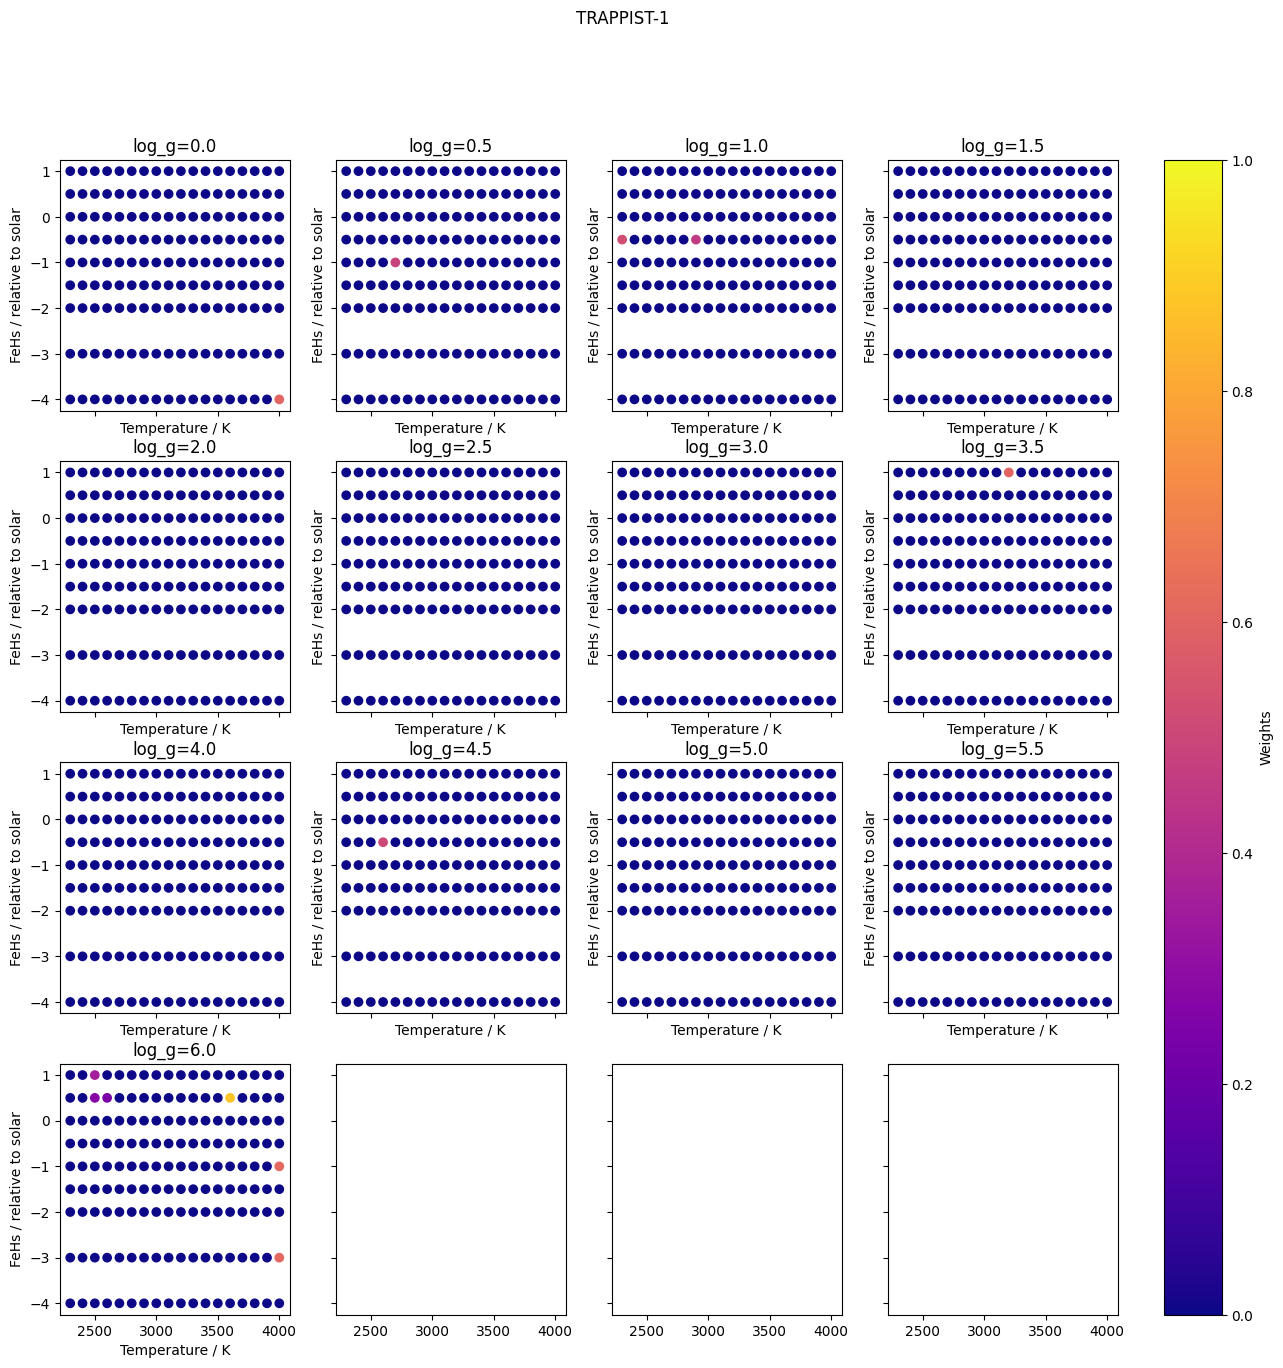

Jy
Jy


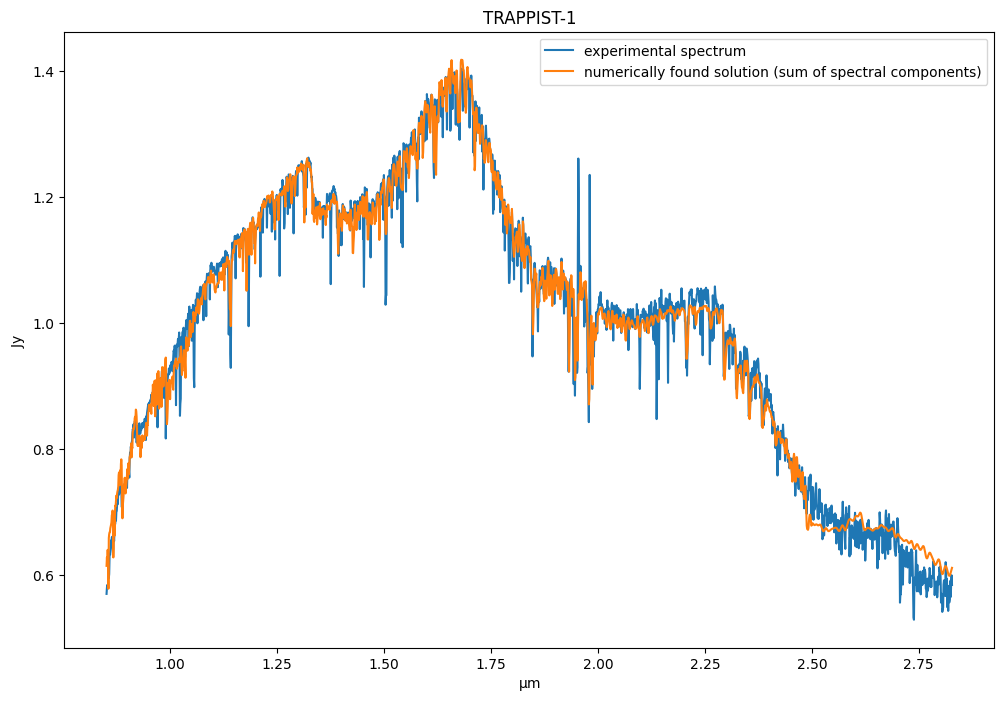

In [4]:

# # # plot some data # # #

result_map = {}
i = 0
for T_eff, FeH, log_g in product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs):
    key = (T_eff, FeH, log_g)
    result_map[key] = i
    i += 1

WEIGHT_COLUMN : str = "weight"

hash_map = pd.DataFrame(columns=[TEFF_COLUMN, FEH_COLUMN, LOGG_COLUMN, WEIGHT_COLUMN])

for T_eff, FeH, log_g in product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs):
    new_row = {TEFF_COLUMN: T_eff, FEH_COLUMN: FeH, LOGG_COLUMN: log_g, WEIGHT_COLUMN: result.x[result_map[(T_eff, FeH, log_g)]]}
    hash_map = pd.concat([hash_map, pd.DataFrame([new_row])], ignore_index=True)

print(hash_map.sort_values(WEIGHT_COLUMN, ascending=False).head(10).round(3))

fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.ravel()
for i, log_g in enumerate(spec_grid.log_gs):
    subset = hash_map[hash_map[LOGG_COLUMN] == log_g]
    x_vals = [a.value for a in subset[TEFF_COLUMN]]
    y_vals = subset[FEH_COLUMN]
    z_vals = subset[WEIGHT_COLUMN]

    sc = axes[i].scatter(x_vals, y_vals, c=z_vals**.2, cmap='plasma', vmin=0, vmax=1)

    axes[i].set_title(f"log_g={log_g}")
    axes[i].set_xlabel("Temperature / K")
    axes[i].set_ylabel("FeHs / relative to solar")
    # axes[i].set_xticks(np.arange(np.min(T_effs) / u.K, np.max(T_effs) / u.K + 1, 50) * u.K)
    # axes[i].grid()

STAR_NAME : str = "TRAPPIST-1"
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label("Weights")
fig.suptitle(STAR_NAME)
plt.show()

plt.figure(figsize=(12,8))
plt.title(STAR_NAME)
print(spectrum_to_decompose.Fluxes[0].unit)
print(A[0][0].unit)
determined_spectrum = spectrum(spectrum_to_decompose.Wavelengths, A @ result.x)
plt.plot(spectrum_to_decompose.Wavelengths, spectrum_to_decompose.Fluxes, label="experimental spectrum")
plt.plot(determined_spectrum.Wavelengths, determined_spectrum.Fluxes, label="numerically found solution (sum of spectral components)")

plt.legend()
plt.show()